<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/The%20Market's%20Not%20Normal/These_Two_Things_are_Not_the_Same.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from my_library import *

20:23:58 Starting...
20:23:58 Installing yfinance into Google notebook...
20:24:03 Installing arch into Google notebook...
20:24:11 Initialized.


In [38]:

ticker,begin,end='^GSPC','1987-01-02','1988-12-31'
df=download(ticker,begin,end).dropna()
df['Daily Return']=df['Adj Close'].pct_change()*hundred
df['Intraday Return']=df['Close']/df['Open']*hundred-hundred
df['Overnight Return']=(hundred+df["Daily Return"])/(hundred+df["Intraday Return"])*hundred-hundred
df.index=pd.DatetimeIndex(df.index).to_period('B')
df.dropna(inplace=True)
df.loc[df["Volume"]==0,"Volume"]=np.nan
display(df)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Daily Return,Intraday Return,Overnight Return
Date,,,,,,,,,
1987-01-05,246.449997,252.570007,246.449997,252.190002,252.190002,181900000.0,2.329075,2.329075,0.000000
1987-01-06,252.199997,253.990005,252.139999,252.779999,252.779999,189300000.0,0.233949,0.229977,0.003963
1987-01-07,252.779999,255.720001,252.649994,255.330002,255.330002,190900000.0,1.008784,1.008784,0.000000
1987-01-08,255.360001,257.279999,254.970001,257.279999,257.279999,194500000.0,0.763716,0.751879,0.011749
1987-01-09,257.260010,259.200012,256.109985,258.730011,258.730011,193000000.0,0.563593,0.571407,-0.007769
...,...,...,...,...,...,...,...,...,...
1988-12-23,276.869995,277.989990,276.869995,277.869995,277.869995,81760000.0,0.361180,0.361180,0.000000
1988-12-27,277.869995,278.089996,276.739990,276.829987,276.829987,87490000.0,-0.374279,-0.374279,0.000000
1988-12-28,276.829987,277.549988,276.170013,277.079987,277.079987,110630000.0,0.090308,0.090308,0.000000


22:13:46 Year: 1987
Mean Daily Return:   0.02 %
Median Daily Return: 0.16 %


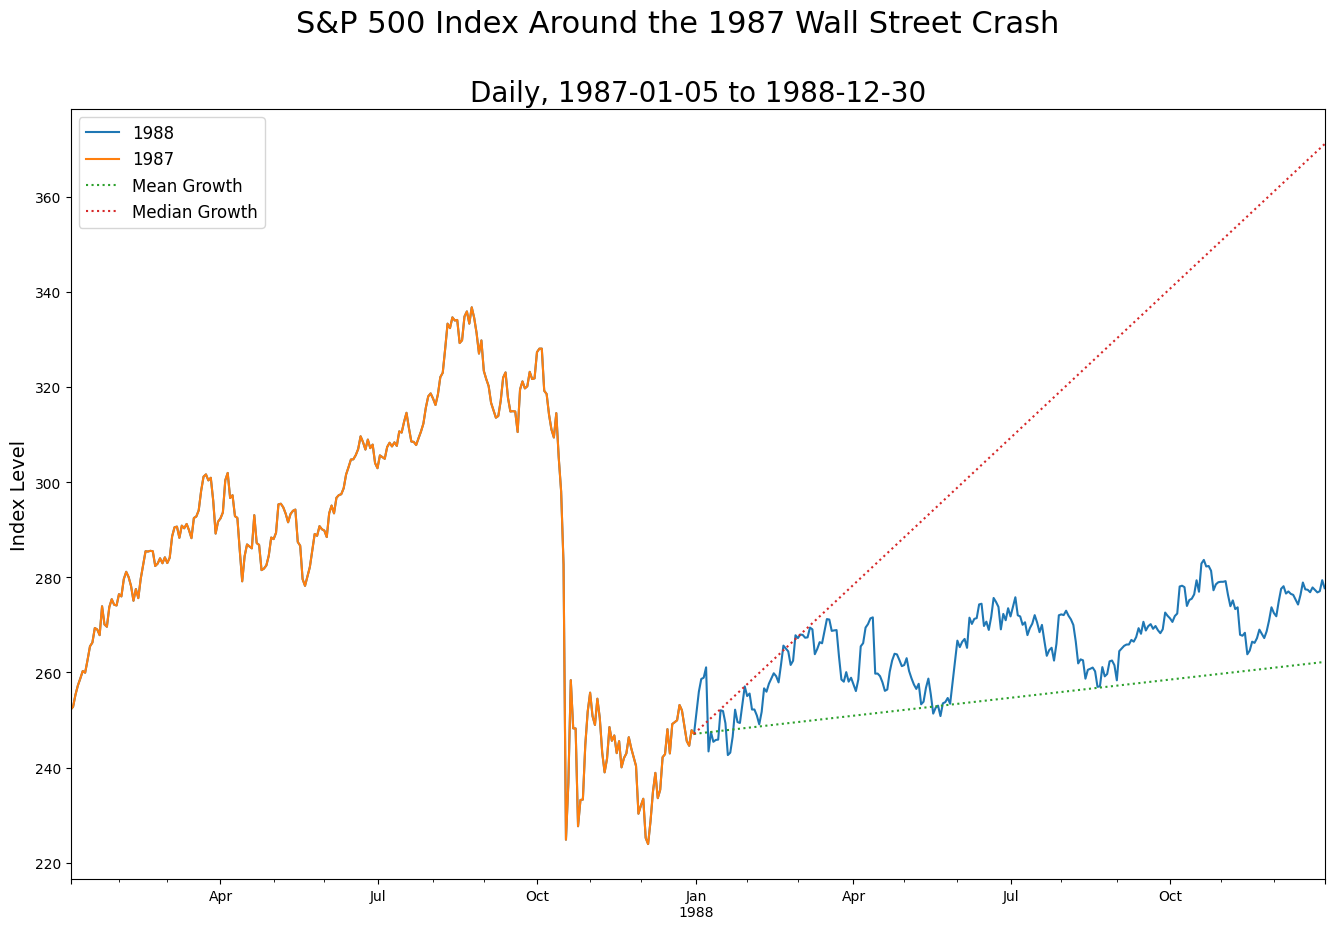

In [68]:
y1,y2=df[df.index.year==df.index[0].year],df[df.index.year==df.index[-1].year]
mn,md=y1["Daily Return"].mean(),y1["Daily Return"].median()
nprint("Year: %d\nMean Daily Return:   %.2f %%\nMedian Daily Return: %.2f %%" % (y1.index[0].year,mn,md))

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))

for d in df,y1:
    d["Adj Close"].plot(ax=plot,label=str(d.index[0].year))

grow=(y2.index[-1]-y1.index[-1]).n
projections=pd.DataFrame({
    "Date":[y1.index[-1],y1.index[-1]+grow],
    "Mean Growth":[y1.loc[y1.index[-1],"Adj Close"],y1.loc[y1.index[-1],"Adj Close"]*np.power(one+mn/hundred,grow)],
    "Median Growth":[y1.loc[y1.index[-1],"Adj Close"],y1.loc[y1.index[-1],"Adj Close"]*np.power(one+md/hundred,grow)]
}).set_index("Date")
projections.plot(ax=plot,linestyle=':')

plot.legend([str(y2.index[-1].year),str(y1.index[-1].year),"Mean Growth","Median Growth"],fontsize=12)
title="S&P 500 Index Around the 1987 Wall Street Crash"
figure.suptitle(title,fontsize=22)
plot.set_title("Daily, %s to %s" % (df.index[0],df.index[-1]),fontsize=20)
plot.set_xlabel(None)
plot.set_ylabel("Index Level",fontsize=14)
figure.savefig(title+".png",dpi=300,bbox_inches='tight')

In [67]:
grow.n

261

TypeError: float() argument must be a string or a real number, not 'Period'

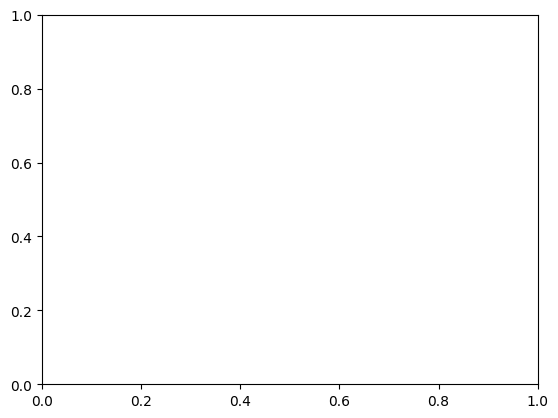

In [29]:
pl.plot(x,x)